In [1]:
import starfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import curve_fit
from scipy.stats import t
sns.set(style='ticks', context='notebook')

Read the scores of the extracted particles of the job assuming regular defocus handedness and the job assuming an inverted defocus handedness. 

In [16]:
regular = starfile.read('tm_patch_def_reg/9x9_ts_27_particles.star')
inverted = starfile.read('tm_patch_def_inv/9x9_ts_27_particles.star')

# divide by the standard deviation of the search to express in nr. of sigma
scores_reg = regular['rlnLCCmax'] / regular['rlnSearchStd']
scores_inv = inverted['rlnLCCmax'] / inverted['rlnSearchStd']

In [3]:
coord_cols = ['rlnCoordinateX', 'rlnCoordinateY', 'rlnCoordinateZ']
coords_reg = np.array(regular[coord_cols])
coords_inv = np.array(inverted[coord_cols])

I use cdist to check if the set of coordinates is identical. As the minimum value in each row is zero, the set of coordinates are identical. This means all annotations can be kept.

In [4]:
cdist(coords_reg, coords_inv, metric='euclidean').min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Below I make a scatter plot of the x-coordinates versus the LCC<sub>max</sub> scores. Afterwards, I fit a quadratic curve to these points to visualize whether there is any consistent change between the scores of the regular/inverted defocus handedness jobs. The y-limits are further limited for the second plot to better visualize small changes between the fitted curves.

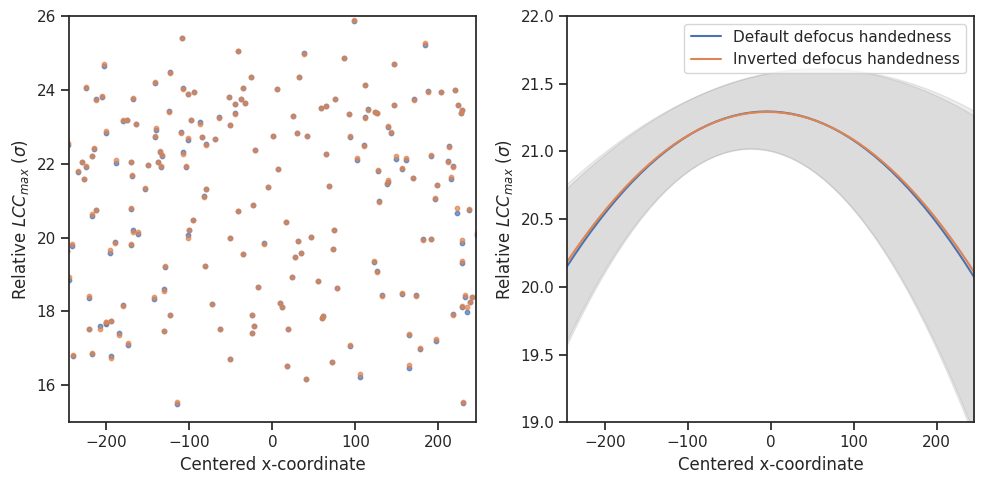

In [13]:
x_size = 510

def quadratic(x, a_2, a_1, a_0):
    return a_2 * x ** 2 + a_1 * x + a_0

def plot_fit_ci(x, s, func, ax1, ax2, l):
    p, cov = curve_fit(func, x, s)
    sigma = np.sqrt(np.diagonal(cov))
    xs = np.linspace(min(x), max(x))
    bound_upper = func(xs, *(p + sigma))
    bound_lower = func(xs, *(p - sigma))
    trans = plt.gca().transData
    ax1.scatter(x, s, s=10, alpha=.7)
    ax2.plot(xs, func(xs, *p), label=l)
    ax2.fill_between(xs, bound_lower, bound_upper,
                 color = 'black', alpha = 0.07)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax1, ax2 = ax
plot_fit_ci(coords_reg[:, 0] - x_size / 2 , scores_reg, quadratic, ax1, ax2, 'Default defocus handedness')
plot_fit_ci(coords_inv[:, 0] - x_size / 2 , scores_inv, quadratic, ax1, ax2, 'Inverted defocus handedness')
ax1.set_xlim(-x_size / 2 + 10, x_size / 2 - 10)
ax1.set_xlabel('Centered x-coordinate')
ax1.set_ylabel(r'Relative $LCC_{max}$ ($\sigma$)')
ax1.set_ylim(15, 26)
ax2.set_xlim(-x_size / 2 + 10, x_size / 2 - 10)
ax2.set_xlabel('Centered x-coordinate')
ax2.set_ylabel(r'Relative $LCC_{max}$ ($\sigma$)')
ax2.set_ylim(19, 22)
plt.legend()
plt.tight_layout()
plt.savefig('x_vs_defocus.svg')
